# FGOALS Missing epfy data

I noticed in this [notebook](/home/links/ct715/eddy_feedback/chapter1/resolution/efp_comps_original-res.ipynb) that FGOALS is missing large amounts of data for divFy. This must come from epfy, so let's investigate.

In [1]:
import xarray as xr
import functions.eddy_feedback as ef
import functions.data_wrangling as data

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

### Processed data

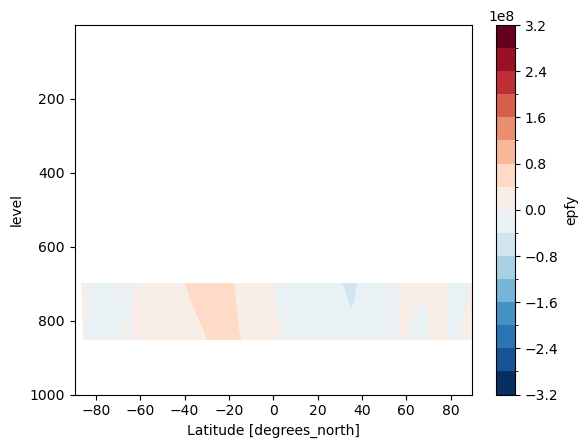

In [2]:
ds = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/missing_data_files/FGOALS*.nc')
ds.epfy.mean(('time', 'ens_ax')).plot.contourf(levels=20, yincrease=False)

### Original data

In [12]:
og_ua = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua/FGOALS-f3-L/*.nc',
    combine='nested',
    concat_dim='ens_ax',
    parallel=True,
    chunks={'time': 31}
)
og_ua

<xarray.Dataset>
Dimensions:    (time: 15, ens_ax: 100, bnds: 2, plev: 19, lat: 180, lon: 288)
Coordinates:
  * time       (time) object 2000-04-16 00:00:00 ... 2001-06-16 00:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Dimensions without coordinates: ens_ax, bnds
Data variables:
    time_bnds  (ens_ax, time, bnds) object dask.array<chunksize=(1, 15, 2), meta=np.ndarray>
    lat_bnds   (ens_ax, lat, bnds) float64 dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lon_bnds   (ens_ax, lon, bnds) float64 dask.array<chunksize=(1, 288, 2), meta=np.ndarray>
    ua         (ens_ax, time, plev, lat, lon) float32 dask.array<chunksize=(1, 15, 19, 180, 288), meta=np.ndarray>
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PAMIP
    branch_method:          Spin-up documentation
    branch_time_in_child:   2310.0
    branch_time_in_parent:  12345.0
    contact:                Bian He(heb@lasg.iap.ac.cn)
    ...                     ...
    title:                  FGOALS-f3-L output prepared for CMIP6
    tracking_id:            hdl:21.14100/82af8beb-fb16-4b98-b4fc-d4ffde44e9d8
    variable_id:            ua
    variant_label:          r100i1p1f1
    license:                CMIP6 model data produced by LASG, Institute of A...
    cmor_version:           3.5.0

In [13]:
og_epfy = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/epfy/FGOALS-f3-L/*.nc',
    combine='nested',
    concat_dim='ens_ax',
    parallel=True,
    chunks={'time': 31}
)
og_epfy

<xarray.Dataset>
Dimensions:  (ens_ax: 100, time: 15, plev: 8, lat: 180)
Coordinates:
  * time     (time) object 2000-04-16 00:00:00 ... 2001-06-16 00:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: ens_ax
Data variables:
    epfy     (ens_ax, time, plev, lat) float32 dask.array<chunksize=(1, 15, 8, 180), meta=np.ndarray>

In [15]:
og_ua = data.data_checker1000(og_ua)
og_epfy = data.data_checker1000(og_epfy)

og_ua = og_ua.interp(level=og_epfy.level)
og_ua

<xarray.Dataset>
Dimensions:    (time: 15, ens_ax: 100, bnds: 2, lat: 180, lon: 288, level: 8)
Coordinates:
  * time       (time) object 2000-04-16 00:00:00 ... 2001-06-16 00:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * level      (level) float64 1e+03 850.0 700.0 500.0 250.0 100.0 50.0 10.0
Dimensions without coordinates: ens_ax, bnds
Data variables:
    time_bnds  (ens_ax, time, bnds) object dask.array<chunksize=(1, 15, 2), meta=np.ndarray>
    lat_bnds   (ens_ax, lat, bnds) float64 dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lon_bnds   (ens_ax, lon, bnds) float64 dask.array<chunksize=(1, 288, 2), meta=np.ndarray>
    u          (ens_ax, time, level, lat, lon) float32 dask.array<chunksize=(1, 15, 8, 180, 288), meta=np.ndarray>
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PAMIP
    branch_method:          Spin-up documentation
    branch_time_in_child:   2310.0
    branch_time_in_parent:  12345.0
    contact:                Bian He(heb@lasg.iap.ac.cn)
    ...                     ...
    title:                  FGOALS-f3-L output prepared for CMIP6
    tracking_id:            hdl:21.14100/82af8beb-fb16-4b98-b4fc-d4ffde44e9d8
    variable_id:            ua
    variant_label:          r100i1p1f1
    license:                CMIP6 model data produced by LASG, Institute of A...
    cmor_version:           3.5.0

In [21]:
og = xr.Dataset({
    'ubar': og_ua.u.mean('lon'),
    'epfy': og_epfy.epfy
})
og = og.sel(time=slice('2000-06', '2001-05'))
og = ef.calculate_divFphi(og)
og

<xarray.Dataset>
Dimensions:  (time: 12, lat: 180, level: 8, ens_ax: 100)
Coordinates:
  * time     (time) object 2000-06-16 00:00:00 ... 2001-05-16 12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * level    (level) float64 1e+03 850.0 700.0 500.0 250.0 100.0 50.0 10.0
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 12, 8, 180), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 12, 8, 180), meta=np.ndarray>
    divFy    (ens_ax, time, level, lat) float64 nan nan ... -1.539e-06

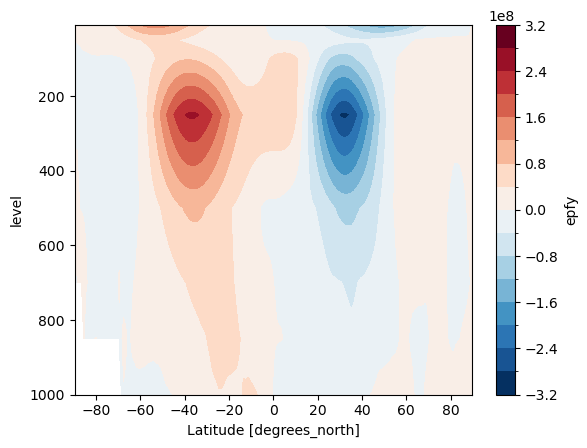

In [23]:
og.epfy.mean(('time', 'ens_ax')).plot.contourf(levels=20, yincrease=False)

In [22]:
# og.to_netcdf('/home/links/ct715/data_storage/PAMIP/processed_monthly/FGOALS-f3-L_1.1_ubar_epfy_divFy.nc')